In [ ]:
import random
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.nn import Parameter

In [ ]:
! git clone --recursive https://github.com/MILVLG/bottom-up-attention.pytorch

Cloning into 'bottom-up-attention.pytorch'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 557 (delta 4), reused 9 (delta 3), pack-reused 536
Receiving objects: 100% (557/557), 7.23 MiB | 11.30 MiB/s, done.
Resolving deltas: 100% (297/297), done.
Submodule 'detectron2' (https://github.com/facebookresearch/detectron2) registered for path 'detectron2'
Cloning into '/content/bottom-up-attention.pytorch/detectron2'...
remote: Enumerating objects: 25, done.        
remote: Counting objects: 100% (25/25), done.        
remote: Compressing objects: 100% (20/20), done.        
remote: Total 10288 (delta 7), reused 9 (delta 3), pack-reused 10263        
Receiving objects: 100% (10288/10288), 4.29 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (7409/7409), done.
Submodule path 'detectron2': checked out 'be792b959bca9af0aacfa04799537856c7a92802'


In [ ]:
!pip install pyyaml==5.1

     |████████████████████████████████| 276kB 7.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=be5e42a4a0a3d5d4c51277b7598516893af7fe3748824e9c40584521d80767dc
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# ! cd bottom-up-attention.pytorch/
# ! cd detectron2
! pip install -e bottom-up-attention.pytorch/detectron2
# ! cd ..

Obtaining file:///content/bottom-up-attention.pytorch/detectron2
     |████████████████████████████████| 51kB 6.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210220-cp36-none-any.whl size=52292 sha256=8afdcdaa083b94e300fc1ecfff768c0d36cab223f0c9f922ab53f780f90b0658
  Stored in directory: /root/.cache/pip/wheels/a1/af/2b/42e10bc07a70a2776e1a011d058a952db114a60f7bc8aa2199
  Created wheel for iopath: filename=iopath-0.1.4-cp36-none-any.whl size=15571 sha256=0fa5b938cade0b9eda9f99955c702fd83be4a0455006f73626a5f6346c348cfc
  Stored in directory: /root/.cache/pip/wheels/54/3b/fb/25b60ef5989e3f5fd76fdc575c922e6e59066ddbd1b44756a9
Successfully built fvcore iopath
  Running setup.py develop for detectron2


In [ ]:
# install apex
! git clone https://github.com/NVIDIA/apex.git

Cloning into 'apex'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7891 (delta 0), reused 0 (delta 0), pack-reused 7885
Receiving objects: 100% (7891/7891), 13.99 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (5385/5385), done.


In [ ]:
! python apex/setup.py install



torch.__version__  = 1.7.0+cu101


apex/setup.py:67: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
  warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")
running install
running bdist_egg
running egg_info
creating apex.egg-info
writing apex.egg-info/PKG-INFO
writing dependency_links to apex.egg-info/dependency_links.txt
writing top-level names to apex.egg-info/top_level.txt
writing manifest file 'apex.egg-info/SOURCES.txt'
reading manifest file 'apex.egg-info/SOURCES.txt'
writing manifest file 'apex.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying apex.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying apex.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying apex.egg-info/dependency_links.txt -> bu

In [ ]:
# install the rest modules
! python apex/setup.py build develop



torch.__version__  = 1.7.0+cu101


apex/setup.py:67: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
  warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")
running build
running develop
running egg_info
writing apex.egg-info/PKG-INFO
writing dependency_links to apex.egg-info/dependency_links.txt
writing top-level names to apex.egg-info/top_level.txt
reading manifest file 'apex.egg-info/SOURCES.txt'
writing manifest file 'apex.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/apex.egg-link (link to .)
Removing apex 0.1 from easy-install.pth file
Adding apex 0.1 to easy-install.pth file

Installed /content
Processing dependencies for apex==0.1
Finished processing dependencies for apex==0.1


In [ ]:
! pip install ray

     |████████████████████████████████| 47.5MB 57kB/s 
     |████████████████████████████████| 133kB 61.9MB/s 
     |████████████████████████████████| 71kB 12.4MB/s 
     |████████████████████████████████| 3.2MB 18.8MB/s 
     |████████████████████████████████| 1.3MB 50.4MB/s 
     |████████████████████████████████| 81kB 14.5MB/s 
     |████████████████████████████████| 204kB 59.5MB/s 
     |████████████████████████████████| 81kB 14.1MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 296kB 55.0MB/s 
     |████████████████████████████████| 143kB 60.3MB/s 
     |████████████████████████████████| 102kB 15.6MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12622 sha256=aaf01de6227b773bde5e2c090e18f135751a4bea0c3cb3a14d03d6019d006522
  Stored in directory: /root/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff20687e3bad6867d63155dbde5a7c10f4293
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl s

In [ ]:

# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # opencv is pre-installed on colab

In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# import torch
# assert torch.__version__.startswith("1.7")
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 592kB/s 
     |████████████████████████████████| 2.2MB 7.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201218-cp36-none-any.whl size=40701 sha256=9200f6f835bb0dd1dee76e2d252606f6d0192452f213a5d69eeda29938dee54c
  Stored in directory: /root/.cache/pip/wheels/b5/83/3f/e74a72d264351b5ada512da845a5c6abb81a34f6333c3a54ce
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10508 sha256=3864e2c31d118c7b03a64c99ab2815e67392b036a3584aba069dc48ca531f531
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a2a6b9450ea4246d91840a77e1169f7d4722d76bbc47
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
# # setup_logger()

# # import some common libraries
# import numpy as np
# import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# # import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage import transform
# display plots in this notebook
%matplotlib inline

import os

# set display defaults
plt.rcParams['figure.figsize'] = (12, 9)        # small images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
data_path = 'bottom-up-attention.pytorch/evaluation'

# Load classes
classes = ['__background__']
with open(os.path.join(data_path, 'objects_vocab.txt')) as f:
    for object in f.readlines():
        classes.append(object.split(',')[0].lower().strip())

# Load attributes
attributes = ['__no_attribute__']
with open(os.path.join(data_path, 'attributes_vocab.txt')) as f:
    for att in f.readlines():
        attributes.append(att.split(',')[0].lower().strip())

MetadataCatalog.get("vg").thing_classes = classes

In [ ]:
import argparse
import os
import sys
import torch
import tqdm
import cv2
import numpy as np
sys.path.append('bottom-up-attention.pytorch/detectron2')
sys.path.append('bottom-up-attention.pytorch/')

import detectron2.utils.comm as comm
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.data import build_detection_test_loader, build_detection_train_loader
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, default_setup, launch
from detectron2.evaluation import COCOEvaluator, verify_results

# from utils import mkdir, save_features
# from extract_utils import get_image_blob

# from models.bua.layers.nms import nms

In [ ]:
from detectron2.config import CfgNode as CN


def add_bottom_up_attention_config(cfg, caffe=False):
    """
    Add config for tridentnet.
    """
    _C = cfg
    _C.MODEL.PROPOSAL_GENERATOR = CN()
    _C.MODEL.PROPOSAL_GENERATOR.NAME = "RPN"
    _C.MODEL.PROPOSAL_GENERATOR.HID_CHANNELS = -1
    # Proposal height and width both need to be greater than MIN_SIZE
    # (a the scale used during training or inference)
    _C.MODEL.PROPOSAL_GENERATOR.MIN_SIZE = 0

    # _C.MODEL.BUA = CN()
    # _C.MODEL.BUA.CAFFE = caffe
    # _C.MODEL.BUA.RESNET_VERSION = 1
    # _C.MODEL.BUA.ATTRIBUTE_ON = True
    # _C.MODEL.BUA.EXTRACT_FEATS = True

    # _C.MODEL.BUA.RPN = CN()
    # # out_channels of conv for bottom-up-attentions RPN.
    # _C.MODEL.BUA.RPN.IN_CHANNELS = 1024
    # _C.MODEL.BUA.RPN.CONV_OUT_CHANNELS = 512


    # _C.MODEL.BUA.EXTRACTOR = CN()

    # # EXTRACTOR.MODE {1: extract roi features, 2: extract bbox only ,3: extract roi features by gt_bbox}
    # _C.MODEL.BUA.EXTRACTOR.MODE = 2

    # # config of postprocessing in extractor
    # _C.MODEL.BUA.EXTRACTOR.MIN_BOXES = 10
    # _C.MODEL.BUA.EXTRACTOR.MAX_BOXES = 100
    # _C.MODEL.BUA.EXTRACTOR.CONF_THRESH = 0.2
    # _C.MODEL.BUA.EXTRACTOR.OUTPUT_DIR = ".output/"


    # _C.MODEL.BUA.ATTRIBUTE = CN()
    # _C.MODEL.BUA.ATTRIBUTE.NUM_CLASSES = 401

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# config_file = 'bottom-up-attention.pytorch/configs/bua-caffe/extract-bua-caffe-r101.yaml'

# cfg = get_cfg()
# add_bottom_up_attention_config(cfg, True)
# cfg.merge_from_file(config_file)
# cfg.freeze()

In [ ]:
cfg = get_cfg()
add_bottom_up_attention_config(cfg, True)
cfg.merge_from_file("bottom-up-attention.pytorch/configs/bua-caffe/extract-bua-caffe-r101-fix36.yaml")
cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 300
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.6
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
cfg.freeze()
# VG Weight
# cfg.MODEL.WEIGHTS = "/content/drive/My Drive/multi-modal/faster_rcnn_from_caffe.pkl"

Config 'bottom-up-attention.pytorch/configs/bua-caffe/extract-bua-caffe-r101-fix36.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [ ]:
model = DefaultTrainer.build_model(cfg)
DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
    "/content/drive/My Drive/multi-modal/faster_rcnn_from_caffe.pkl", resume=True
)
model.eval()

ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
      )
      (1): BottleneckBlock(

In [ ]:

# NUM_OBJECTS = 36

# from detectron2.modeling.postprocessing import detector_postprocess
# from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image

# def doit(raw_image):
#     with torch.no_grad():
#         raw_height, raw_width = raw_image.shape[:2]
#         print("Original image size: ", (raw_height, raw_width))
        
#         # Preprocessing
#         # image = predictor.transform_gen.get_transform(raw_image).apply_image(raw_image)
#         # print("Transformed image size: ", image.shape[:2])
#         image = raw_image
#         image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))
#         inputs = [{"image": image, "height": raw_height, "width": raw_width}]
#         images = predictor.model.preprocess_image(inputs)
        
#         # Run Backbone Res1-Res4
#         features = predictor.model.backbone(images.tensor)
        
#         # Generate proposals with RPN
#         proposals, _ = predictor.model.proposal_generator(images, features, None)
#         proposal = proposals[0]
#         print('Proposal Boxes size:', proposal.proposal_boxes.tensor.shape)
        
#         # Run RoI head for each proposal (RoI Pooling + Res5)
#         proposal_boxes = [x.proposal_boxes for x in proposals]
#         features = [features[f] for f in predictor.model.roi_heads.in_features]
#         box_features = predictor.model.roi_heads._shared_roi_transform(
#             features, proposal_boxes
#         )
#         feature_pooled = box_features.mean(dim=[2, 3])  # pooled to 1x1
#         print('Pooled features size:', feature_pooled.shape)
        
#         # Predict classes and boxes for each proposal.
#         pred_class_logits, pred_proposal_deltas = predictor.model.roi_heads.box_predictor(feature_pooled)
#         outputs = FastRCNNOutputs(
#             predictor.model.roi_heads.box2box_transform,
#             pred_class_logits,
#             pred_proposal_deltas,
#             proposals,
#             predictor.model.roi_heads.smooth_l1_beta,
#         )
#         probs = outputs.predict_probs()[0]
#         boxes = outputs.predict_boxes()[0]
        
#         # Note: BUTD uses raw RoI predictions,
#         #       we use the predicted boxes instead.
#         # boxes = proposal_boxes[0].tensor    
        
#         # NMS
#         for nms_thresh in np.arange(0.5, 1.0, 0.1):
#             instances, ids = fast_rcnn_inference_single_image(
#                 boxes, probs, image.shape[1:], 
#                 score_thresh=0.2, nms_thresh=nms_thresh, topk_per_image=NUM_OBJECTS
#             )
#             if len(ids) == NUM_OBJECTS:
#                 break
                
        # instances = detector_postprocess(instances, raw_height, raw_width)
        # roi_features = feature_pooled[ids].detach()
        # print(instances)
        
        # return instances, roi_features

In [ ]:
# import os
# import io
# # import some common libraries
# import numpy as np
# import cv2
# import torch

# # Show the image in ipynb
# from IPython.display import clear_output, Image, display
# import PIL.Image

# def showarray(a, fmt='jpeg'):
#     a = np.uint8(np.clip(a, 0, 255))
#     f = io.BytesIO()
#     PIL.Image.fromarray(a).save(f, fmt)
#     display(Image(data=f.getvalue()))

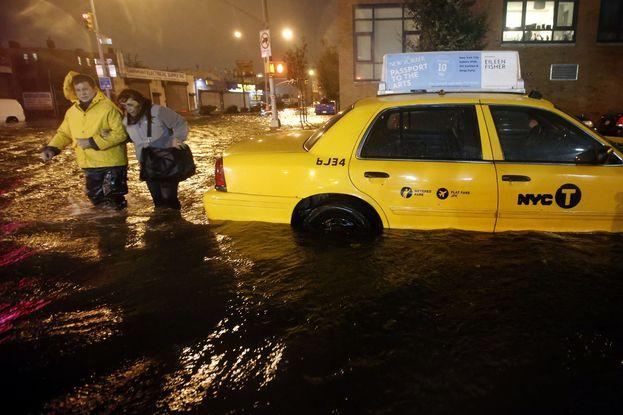

In [ ]:
# im = cv2.imread("sandy_real_125.jpg")
# im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# showarray(im_rgb)

In [ ]:
# instances, features = doit(im)

# print(instances.pred_boxes)
# print(instances.scores)
# print(instances.pred_classes)

Original image size:  (415, 623)
Proposal Boxes size: torch.Size([300, 4])
Pooled features size: torch.Size([300, 2048])


ModuleAttributeError: ignored

In [ ]:
# MIN_BOXES = 10
# MAX_BOXES = 20
# CONF_THRESH = 0.4

# model = DefaultTrainer.build_model(cfg)
# DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
#     '/content/drive/My Drive/multi-modal/'+cfg.MODEL.WEIGHTS, resume=True
# )
# model.eval()

ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
Skip loading parameter 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (512, 1024, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (512,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (24, 512, 1, 1) in the checkpoint but (12, 1024, 1, 1) in the model! Yo

GeneralizedBUARCNN(
  (backbone): ResNet(
    (stem): BUABasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
      )
      (1): Bottleneck

In [ ]:
PIXEL_MEANS = np.array([[[102.9801, 115.9465, 122.7717]]])
TEST_SCALES = (600,)
TEST_MAX_SIZE = 1000

In [ ]:
def get_image_blob(im, pixel_means):
    """Converts an image into a network input.
    Arguments:
        im (ndarray): a color image
    Returns:
        blob (ndarray): a data blob holding an image pyramid
        im_scale_factors (list): list of image scales (relative to im) used
            in the image pyramid
    """
    pixel_means = np.array([[pixel_means]])
    dataset_dict = {}
    im_orig = im.astype(np.float32, copy=True)
    im_orig -= pixel_means

    im_shape = im_orig.shape
    im_size_min = np.min(im_shape[0:2])
    im_size_max = np.max(im_shape[0:2])

    for target_size in TEST_SCALES:
        im_scale = float(target_size) / float(im_size_min)
        # Prevent the biggest axis from being more than MAX_SIZE
        if np.round(im_scale * im_size_max) > TEST_MAX_SIZE:
            im_scale = float(TEST_MAX_SIZE) / float(im_size_max)
        im = cv2.resize(im_orig, None, None, fx=im_scale, fy=im_scale,
                        interpolation=cv2.INTER_LINEAR)

    dataset_dict["image"] = torch.from_numpy(im).permute(2, 0, 1)
    dataset_dict["im_scale"] = im_scale

    return dataset_dict

In [ ]:
im_file = '/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/rumor_images/bce843d2gw1eh102v43spj20ef0bw75d.jpg'

im = cv2.imread(im_file)

In [ ]:
NUM_OBJECTS = 36

In [ ]:
from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image

with torch.no_grad() :
  raw_height, raw_width = im.shape[:2]
  dataset_dict = get_image_blob(im, cfg.MODEL.PIXEL_MEAN)
  inputs = [{"image": dataset_dict['image'], "height": raw_height, "width": raw_width}]
  images = model.preprocess_image(inputs)
  image = dataset_dict['image']

  features = model.backbone(images.tensor)

  # Generate proposals with RPN
  proposals, _ = model.proposal_generator(images, features, None)
  proposal = proposals[0]
  print('Proposal Boxes size:', proposal.proposal_boxes.tensor.shape)

  # Run RoI head for each proposal (RoI Pooling + Res5)
  proposal_boxes = [x.proposal_boxes for x in proposals]
  features = [features[f] for f in model.roi_heads.in_features]
  box_features = model.roi_heads._shared_roi_transform(
      features, proposal_boxes
  )
  feature_pooled = box_features.mean(dim=[2, 3])  # pooled to 1x1
  print('Pooled features size:', feature_pooled.shape)

  # Predict classes and boxes for each proposal.
  pred_class_logits, pred_proposal_deltas = model.roi_heads.box_predictor(feature_pooled)
  outputs = FastRCNNOutputs(
      model.roi_heads.box2box_transform,
      pred_class_logits,
      pred_proposal_deltas,
      proposals,
      0.0,
  )
  probs = outputs.predict_probs()[0]
  boxes = outputs.predict_boxes()[0]

  # Note: BUTD uses raw RoI predictions,
  #       we use the predicted boxes instead.
  # boxes = proposal_boxes[0].tensor    

  # NMS
  for nms_thresh in np.arange(0.5, 1.0, 0.1):
      instances, ids = fast_rcnn_inference_single_image(
          boxes, probs, image.shape[1:], 
          score_thresh=0.2, nms_thresh=nms_thresh, topk_per_image=NUM_OBJECTS
      )
      if len(ids) == NUM_OBJECTS:
          break
          
  instances = detector_postprocess(instances, raw_height, raw_width)
  roi_features = feature_pooled[ids].detach()

Proposal Boxes size: torch.Size([189, 4])
Pooled features size: torch.Size([189, 2048])


/content/bottom-up-attention.pytorch/detectron2/detectron2/modeling/roi_heads/fast_rcnn.py:111: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [ ]:
roi_features.shape

torch.Size([36, 2048])

In [ ]:
instances

Instances(num_instances=36, image_height=428, image_width=519, fields=[pred_boxes: Boxes(tensor([[196.8701,   7.1717, 338.0312,  89.5591],
        [196.4413,   0.0000, 368.5802, 100.3704],
        [211.4465,   6.4182, 260.5789,  39.4658],
        [206.7697,   0.0000, 346.9594,  88.4902],
        [212.0995,  26.0437, 254.2111,  65.2887],
        [  7.5588,   0.0000, 170.8722, 136.8083],
        [  7.3431,   0.0000, 148.7525, 185.6860],
        [  5.5940,   1.7457, 508.6398, 410.0081],
        [144.4561,   0.0000, 377.2364, 106.7061],
        [136.3512, 384.6770, 224.5838, 423.4819],
        [212.1434,  22.1044, 250.2769,  62.2761],
        [210.9655,  19.6536, 260.8751,  60.6550],
        [ 19.7580,   0.5237, 179.6743, 122.9908],
        [215.2919,  21.8524, 259.1092,  64.1622],
        [  0.9717, 318.4864,  39.5317, 390.8165],
        [  4.4809, 320.0074,  30.6733, 401.2916],
        [171.1946,   5.8985, 376.9411, 136.6373],
        [ 23.5619, 255.3582, 226.6541, 423.6246],
        [ 1

In [ ]:
instances.pred_classes = instances.pred_classes+1

In [ ]:
instances.pred_classes

tensor([  51,   51,  120,   51,  328,  365,  365,  184,   51,  684,  328,  328,
         365,  328,  370,  370,   51,  292,  365,  192, 1050,  373,   51,  184,
         454,  684,  942,  370,  118,  454,  226,  365,  118,  192,  328,  118],
       device='cuda:0')

In [ ]:
# Show the image in ipynb
from IPython.display import clear_output, Image, display
import PIL.Image
import io
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

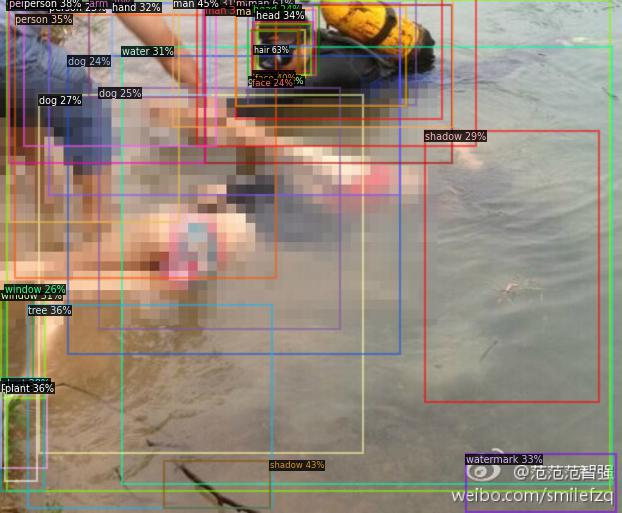

instances:
 Instances(num_instances=36, image_height=428, image_width=519, fields=[pred_boxes: Boxes(tensor([[196.8701,   7.1717, 338.0312,  89.5591],
        [196.4413,   0.0000, 368.5802, 100.3704],
        [211.4465,   6.4182, 260.5789,  39.4658],
        [206.7697,   0.0000, 346.9594,  88.4902],
        [212.0995,  26.0437, 254.2111,  65.2887],
        [  7.5588,   0.0000, 170.8722, 136.8083],
        [  7.3431,   0.0000, 148.7525, 185.6860],
        [  5.5940,   1.7457, 508.6398, 410.0081],
        [144.4561,   0.0000, 377.2364, 106.7061],
        [136.3512, 384.6770, 224.5838, 423.4819],
        [212.1434,  22.1044, 250.2769,  62.2761],
        [210.9655,  19.6536, 260.8751,  60.6550],
        [ 19.7580,   0.5237, 179.6743, 122.9908],
        [215.2919,  21.8524, 259.1092,  64.1622],
        [  0.9717, 318.4864,  39.5317, 390.8165],
        [  4.4809, 320.0074,  30.6733, 401.2916],
        [171.1946,   5.8985, 376.9411, 136.6373],
        [ 23.5619, 255.3582, 226.6541, 423.6246],

In [ ]:
pred = instances.to('cpu')
v = Visualizer(im[:, :, :], MetadataCatalog.get("vg"), scale=1.2)
v = v.draw_instance_predictions(pred)
showarray(v.get_image()[:, :, ::-1])
print('instances:\n', instances)
print()
print('boxes:\n', instances.pred_boxes)
print()
# print('Shape of features:\n', features.shape)

In [ ]:
from os import walk
mypath = "/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/rumor_images/"
train = []
for (dirpath, dirnames, filenames) in walk(mypath):
    train.extend(filenames)
    break

In [ ]:
from os import walk
mypath = "/content/drive/My Drive/multi-modal/weibo/airsplay/feat_rumor/"
train_feat = []
for (dirpath, dirnames, filenames) in walk(mypath):
    train_feat.extend(filenames)
    break

In [ ]:
len(train_feat)

7930

In [ ]:
len(train)

7977

In [ ]:
tr_img = [img[:-4] for img in train]
tr_feat = [img[:-4] for img in train_feat]

In [ ]:
extra = []
for img in tr_img :
  if (img not in tr_feat) :
    extra.append(img)

In [ ]:
extra_img = []
for img in extra :
  for img1 in train :
    if(img == img1[:-4]) :
      extra_img.append(img1)

In [ ]:
extra_img

['a716fd45jw1ev0cgf8j46g209505zh4i.gif',
 'a716fd45jw1ev0cgf8j46g209505zh4i.jpg',
 'a716fd45jw1ev0cghhukxg208g05z14k.gif',
 'a716fd45jw1ev0cghhukxg208g05z14k.jpg',
 'a716fd45jw1ev0cggeuvhg209505z7j1.gif',
 'a716fd45jw1ev0cggeuvhg209505z7j1.jpg',
 '93f8d29dgw1estpv7102og206z099qv5.gif',
 '93f8d29dgw1estpv7102og206z099qv5.jpg',
 '93f8d29dgw1estpvsy5iug206z0997wh.gif',
 '93f8d29dgw1estpvsy5iug206z0997wh.jpg',
 '93f8d29dgw1estpust102g20bo06khdt.gif',
 '93f8d29dgw1estpust102g20bo06khdt.jpg',
 '93f8d29dgw1estpvj3dhyg20bo06knpd.gif',
 '93f8d29dgw1estpvj3dhyg20bo06knpd.jpg',
 '93f8d29dgw1estpw41avsg20bo06ke81.gif',
 '93f8d29dgw1estpw41avsg20bo06ke81.jpg',
 '93f8d29dgw1estpwgz9slg20bo052qv5.gif',
 '93f8d29dgw1estpwgz9slg20bo052qv5.jpg',
 '93f8d29dgw1estpwvpp0vg20dw07t1ky.gif',
 '93f8d29dgw1estpwvpp0vg20dw07t1ky.jpg',
 '93f8d29dgw1estpxqb92ig20dw0f11l0.gif',
 '93f8d29dgw1estpxqb92ig20dw0f11l0.jpg',
 '957e1cf2tw1e5foxts295g206o03p4qp.gif',
 '957e1cf2tw1e5foxts295g206o03p4qp.jpg',
 '7da75521gw1ele

In [ ]:
# from PIL import Image 
# for img in extra_img :
#   Image.open('/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/rumor_images/'+img).convert('RGB').save('/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/rumor_images/' + img[:-4]+'.jpg')

In [ ]:
extra_only_img = []
for img in extra_img :
  if(img[-3:]=='jpg' or img[-3:]=='png') :
    extra_only_img.append(img)

In [ ]:
len(extra_only_img)

47

In [ ]:
extra_only_img

['a716fd45jw1ev0cgf8j46g209505zh4i.jpg',
 'a716fd45jw1ev0cghhukxg208g05z14k.jpg',
 'a716fd45jw1ev0cggeuvhg209505z7j1.jpg',
 '93f8d29dgw1estpv7102og206z099qv5.jpg',
 '93f8d29dgw1estpvsy5iug206z0997wh.jpg',
 '93f8d29dgw1estpust102g20bo06khdt.jpg',
 '93f8d29dgw1estpvj3dhyg20bo06knpd.jpg',
 '93f8d29dgw1estpw41avsg20bo06ke81.jpg',
 '93f8d29dgw1estpwgz9slg20bo052qv5.jpg',
 '93f8d29dgw1estpwvpp0vg20dw07t1ky.jpg',
 '93f8d29dgw1estpxqb92ig20dw0f11l0.jpg',
 '957e1cf2tw1e5foxts295g206o03p4qp.jpg',
 '7da75521gw1ele2jwpixfg208w050qv5.jpg',
 '7da75521gw1ele2jvi85rg2096056u0x.jpg',
 '7da75521gw1ele2jynz0kg208w050u0x.jpg',
 '7da75521gw1ele2k7pigxg208w050x6p.jpg',
 '7da75521gw1ele2k0pgo2g2096056x6p.jpg',
 '7da75521gw1ele2k5hzv2g208w050x6p.jpg',
 '7da75521gw1ele2k3cwt3g208w050qv5.jpg',
 '7da75521gw1ele2k9ig8wg2096056x6p.jpg',
 '60718250jw1ew6axyd702g207n05me0u.jpg',
 '005vnhZYgw1evupo8ttddg308w06o4qp.jpg',
 '005WvCC0jw1eqa6mxtgegj30f00qo411.jpg',
 '005D4gq0gw1es2lrrwwlug305h09qtun.jpg',
 'a716fd45jw1ev0

In [ ]:
from os import walk
mypath = "/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/nonrumor_images/"
test = []
for (dirpath, dirnames, filenames) in walk(mypath):
    test.extend(filenames)
    break

In [ ]:
from os import walk
mypath = "/content/drive/My Drive/multi-modal/weibo/airsplay/feat_nonrumor/"
test_feat = []
for (dirpath, dirnames, filenames) in walk(mypath):
    test_feat.extend(filenames)
    break

In [ ]:
len(test), len(test_feat)

(5322, 5322)

In [ ]:
import pickle

In [ ]:
train[0][-3:]

'jpg'

In [ ]:
# count = 1
# for image in train :
#   print(count,image)
#   if(image[-3:]=='jpg' or image[-3:]=='png') :
#     im_file = mypath+image
#     im = cv2.imread(im_file)
#     dataset_dict = get_image_blob(im, cfg.MODEL.PIXEL_MEAN)
#     with torch.set_grad_enabled(False):
#       output = model([dataset_dict])
#     output = output[0]['instances']
#     pickle.dump(output, open("/content/drive/My Drive/multi-modal/mediaeval/boxes_train/"+image[:-4]+".pkl","wb"))
#     print("pickled", image[:-4]+".pkl")
#     count+=1

1 sandy_fake_11.jpg
pickled sandy_fake_11.pkl
2 columbianChemicals_fake_01.jpg
pickled columbianChemicals_fake_01.pkl
3 sandy_fake_27.jpg
pickled sandy_fake_27.pkl
4 sandy_real_44.jpg
pickled sandy_real_44.pkl
5 sandy_real_12.jpg
pickled sandy_real_12.pkl
6 boston_fake_34.png
pickled boston_fake_34.pkl
7 sandy_real_36.jpg
pickled sandy_real_36.pkl
8 sandy_fake_02.jpg
pickled sandy_fake_02.pkl
9 sandy_real_22.jpg
pickled sandy_real_22.pkl
10 sandy_fake_48.jpg
pickled sandy_fake_48.pkl
11 sandy_real_154.jpg
pickled sandy_real_154.pkl
12 sandy_real_130.jpg
pickled sandy_real_130.pkl
13 sandy_real_27.jpg
pickled sandy_real_27.pkl
14 sandy_fake_52.jpg
pickled sandy_fake_52.pkl
15 sandy_real_24.jpg
pickled sandy_real_24.pkl
16 sandy_real_164.jpg
pickled sandy_real_164.pkl
17 sandy_real_37.jpg
pickled sandy_real_37.pkl
18 columbianChemicals_fake_02.jpg
pickled columbianChemicals_fake_02.pkl
19 boston_real_10.jpg
pickled boston_real_10.pkl
20 boston_real_23.jpg
pickled boston_real_23.pkl
21 sa

In [ ]:
# count = 1
# for image in test :
#   print(count,image)
#   if(image[-3:]=='jpg' or image[-3:]=='png') :
#     im_file = mypath+image
#     im = cv2.imread(im_file)
#     dataset_dict = get_image_blob(im, cfg.MODEL.PIXEL_MEAN)
#     with torch.set_grad_enabled(False):
#       output = model([dataset_dict])
#     output = output[0]['instances']
#     pickle.dump(output, open("/content/drive/My Drive/multi-modal/mediaeval/boxes_test/"+image[:-4]+".pkl","wb"))
#     print("pickled", image[:-4]+".pkl")
#     count+=1

1 attacks_paris_21.jpg
pickled attacks_paris_21.pkl
2 gandhi_dancing_1.jpg
pickled gandhi_dancing_1.pkl
3 not_afraid_4.jpg
pickled not_afraid_4.pkl
4 fuji_lenticular_2.jpg
pickled fuji_lenticular_2.pkl
5 protest_3.jpg
pickled protest_3.pkl
6 half_everything_2.jpg
pickled half_everything_2.pkl
7 immigrants_fear_1.jpg
pickled immigrants_fear_1.pkl
8 woman_14_children_2.jpg
pickled woman_14_children_2.pkl
9 north_korea_2.jpg
pickled north_korea_2.pkl
10 refugees_8.jpg
pickled refugees_8.pkl
11 half_everything_4.jpg
pickled half_everything_4.pkl
12 bush_book_1.jpg
pickled bush_book_1.pkl
13 attacks_paris_20.jpg
pickled attacks_paris_20.pkl
14 pakistan_explosion_1.jpg
pickled pakistan_explosion_1.pkl
15 hubble_telescope_1.jpg
pickled hubble_telescope_1.pkl
16 not_afraid_3.jpg
pickled not_afraid_3.pkl
17 refugees_14.jpg
pickled refugees_14.pkl
18 protest_5.jpg
pickled protest_5.pkl
19 refugees_7.jpg
pickled refugees_7.pkl
20 attacks_paris_22.png
pickled attacks_paris_22.pkl
21 half_everythin

In [ ]:
import pickle

In [ ]:
from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image

count = 1
for image_val in extra_only_img :
  print(count,image_val)
  if(image_val[-3:]=='jpg' or image_val[-3:]=='png') :
    mypath = "/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/rumor_images/"
    im_file = mypath+image_val
    im = cv2.imread(im_file)
    with torch.no_grad() :
      # print(im)
      if (im.any()==None) :
        continue
      else :
        raw_height, raw_width = im.shape[:2]
        dataset_dict = get_image_blob(im, cfg.MODEL.PIXEL_MEAN)
        inputs = [{"image": dataset_dict['image'], "height": raw_height, "width": raw_width}]
        images = model.preprocess_image(inputs)
        image = dataset_dict['image']

        features = model.backbone(images.tensor)

        # Generate proposals with RPN
        proposals, _ = model.proposal_generator(images, features, None)
        proposal = proposals[0]
        # print('Proposal Boxes size:', proposal.proposal_boxes.tensor.shape)

        # Run RoI head for each proposal (RoI Pooling + Res5)
        proposal_boxes = [x.proposal_boxes for x in proposals]
        features = [features[f] for f in model.roi_heads.in_features]
        box_features = model.roi_heads._shared_roi_transform(
            features, proposal_boxes
        )
        feature_pooled = box_features.mean(dim=[2, 3])  # pooled to 1x1
        # print('Pooled features size:', feature_pooled.shape)

        # Predict classes and boxes for each proposal.
        pred_class_logits, pred_proposal_deltas = model.roi_heads.box_predictor(feature_pooled)
        outputs = FastRCNNOutputs(
            model.roi_heads.box2box_transform,
            pred_class_logits,
            pred_proposal_deltas,
            proposals,
            0.0,
        )
        probs = outputs.predict_probs()[0]
        boxes = outputs.predict_boxes()[0]

        # Note: BUTD uses raw RoI predictions,
        #       we use the predicted boxes instead.
        # boxes = proposal_boxes[0].tensor    

        # NMS
        for nms_thresh in np.arange(0.5, 1.0, 0.1):
            instances, ids = fast_rcnn_inference_single_image(
                boxes, probs, image.shape[1:], 
                score_thresh=0.2, nms_thresh=nms_thresh, topk_per_image=NUM_OBJECTS
            )
            if len(ids) == NUM_OBJECTS:
                break
                
        instances = detector_postprocess(instances, raw_height, raw_width)
        roi_features = feature_pooled[ids].detach()
        pickle.dump(instances, open("/content/drive/My Drive/multi-modal/weibo/airsplay/boxes_rumor/"+image_val[:-4]+".pkl","wb"))
        pickle.dump(roi_features, open("/content/drive/My Drive/multi-modal/weibo/airsplay/feat_rumor/"+image_val[:-4]+".pkl","wb"))
        print("pickled", image_val[:-4]+".pkl")
        count+=1
      # except :
      #   print("error")
      #   continue

1 a716fd45jw1ev0cgf8j46g209505zh4i.jpg
pickled a716fd45jw1ev0cgf8j46g209505zh4i.pkl
2 a716fd45jw1ev0cghhukxg208g05z14k.jpg
pickled a716fd45jw1ev0cghhukxg208g05z14k.pkl
3 a716fd45jw1ev0cggeuvhg209505z7j1.jpg
pickled a716fd45jw1ev0cggeuvhg209505z7j1.pkl
4 93f8d29dgw1estpv7102og206z099qv5.jpg
pickled 93f8d29dgw1estpv7102og206z099qv5.pkl
5 93f8d29dgw1estpvsy5iug206z0997wh.jpg
pickled 93f8d29dgw1estpvsy5iug206z0997wh.pkl
6 93f8d29dgw1estpust102g20bo06khdt.jpg
pickled 93f8d29dgw1estpust102g20bo06khdt.pkl
7 93f8d29dgw1estpvj3dhyg20bo06knpd.jpg
pickled 93f8d29dgw1estpvj3dhyg20bo06knpd.pkl
8 93f8d29dgw1estpw41avsg20bo06ke81.jpg
pickled 93f8d29dgw1estpw41avsg20bo06ke81.pkl
9 93f8d29dgw1estpwgz9slg20bo052qv5.jpg
pickled 93f8d29dgw1estpwgz9slg20bo052qv5.pkl
10 93f8d29dgw1estpwvpp0vg20dw07t1ky.jpg
pickled 93f8d29dgw1estpwvpp0vg20dw07t1ky.pkl
11 93f8d29dgw1estpxqb92ig20dw0f11l0.jpg
pickled 93f8d29dgw1estpxqb92ig20dw0f11l0.pkl
12 957e1cf2tw1e5foxts295g206o03p4qp.jpg
pickled 957e1cf2tw1e5foxts295g206o

In [ ]:
from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image

count = 1
for image_val in test :
  mypath = "/content/drive/My Drive/WeiboRumorSet/WeiboRumorSet/nonrumor_images/"
  print(count,image_val)
  if(image_val[-3:]=='jpg' or image_val[-3:]=='png') :
    im_file = mypath+image_val
    im = cv2.imread(im_file)
    with torch.no_grad() :
      raw_height, raw_width = im.shape[:2]
      dataset_dict = get_image_blob(im, cfg.MODEL.PIXEL_MEAN)
      inputs = [{"image": dataset_dict['image'], "height": raw_height, "width": raw_width}]
      images = model.preprocess_image(inputs)
      image = dataset_dict['image']

      features = model.backbone(images.tensor)

      # Generate proposals with RPN
      proposals, _ = model.proposal_generator(images, features, None)
      proposal = proposals[0]
      # print('Proposal Boxes size:', proposal.proposal_boxes.tensor.shape)

      # Run RoI head for each proposal (RoI Pooling + Res5)
      proposal_boxes = [x.proposal_boxes for x in proposals]
      features = [features[f] for f in model.roi_heads.in_features]
      box_features = model.roi_heads._shared_roi_transform(
          features, proposal_boxes
      )
      feature_pooled = box_features.mean(dim=[2, 3])  # pooled to 1x1
      # print('Pooled features size:', feature_pooled.shape)

      # Predict classes and boxes for each proposal.
      pred_class_logits, pred_proposal_deltas = model.roi_heads.box_predictor(feature_pooled)
      outputs = FastRCNNOutputs(
          model.roi_heads.box2box_transform,
          pred_class_logits,
          pred_proposal_deltas,
          proposals,
          0.0,
      )
      probs = outputs.predict_probs()[0]
      boxes = outputs.predict_boxes()[0]

      # Note: BUTD uses raw RoI predictions,
      #       we use the predicted boxes instead.
      # boxes = proposal_boxes[0].tensor    

      # NMS
      for nms_thresh in np.arange(0.5, 1.0, 0.1):
          instances, ids = fast_rcnn_inference_single_image(
              boxes, probs, image.shape[1:], 
              score_thresh=0.2, nms_thresh=nms_thresh, topk_per_image=NUM_OBJECTS
          )
          if len(ids) == NUM_OBJECTS:
              break
              
      instances = detector_postprocess(instances, raw_height, raw_width)
      roi_features = feature_pooled[ids].detach()
      pickle.dump(instances, open("/content/drive/My Drive/multi-modal/weibo/airsplay/boxes_nonrumor/"+image_val[:-4]+".pkl","wb"))
      pickle.dump(roi_features, open("/content/drive/My Drive/multi-modal/weibo/airsplay/feat_nonrumor/"+image_val[:-4]+".pkl","wb"))
      print("pickled", image_val[:-4]+".pkl")
      count+=1

Streaming output truncated to the last 5000 lines.
2823 652f5916jw1etg4dzvmn6j20c85df4qp.jpg
pickled 652f5916jw1etg4dzvmn6j20c85df4qp.pkl
2824 652f5916jw1euyrnv3orzj20dw099jrq.jpg
pickled 652f5916jw1euyrnv3orzj20dw099jrq.pkl
2825 652f5916jw1ev0atmti1ij20c80c8t9k.jpg
pickled 652f5916jw1ev0atmti1ij20c80c8t9k.pkl
2826 652f5916jw1ey2ot4f7luj20zk0qo41b.jpg
pickled 652f5916jw1ey2ot4f7luj20zk0qo41b.pkl
2827 652f5916jw1ey2ot4jfz2j20zk0qodj6.jpg
pickled 652f5916jw1ey2ot4jfz2j20zk0qodj6.pkl
2828 652f5916jw1ey2ot4pu3jj20zk0qo77i.jpg
pickled 652f5916jw1ey2ot4pu3jj20zk0qo77i.pkl
2829 652f5916jw1ey4xtwj6tzj20c8096wf2.jpg
pickled 652f5916jw1ey4xtwj6tzj20c8096wf2.pkl
2830 652f5916jw1ey4xu08m48j20c809d0t3.jpg
pickled 652f5916jw1ey4xu08m48j20c809d0t3.pkl
2831 652f5916jw1ey50jxwoibj20ck08d3z4.jpg
pickled 652f5916jw1ey50jxwoibj20ck08d3z4.pkl
2832 652f5916jw1ey8geyp5rjj20ck082jsc.jpg
pickled 652f5916jw1ey8geyp5rjj20ck082jsc.pkl
2833 652f5916jw1ey8uy3l89vj20c80e10u4.jpg
pickled 652f5916jw1ey8uy3l89vj20c80e1

In [ ]:
instances

Instances(num_instances=36, image_height=415, image_width=623, fields=[pred_boxes: Boxes(tensor([[356.3318, 103.3791, 514.5363, 165.1340],
        [260.5366,  30.9539, 278.3194,  69.0654],
        [ 51.5000,  76.1411, 221.3243, 234.2234],
        [199.1601,   0.0000, 584.3348, 126.1294],
        [ 38.1406,   0.9758, 377.8393,  79.1406],
        [ 43.4337,  73.8831, 133.2443, 215.3712],
        [ 85.8581, 167.9811, 132.3113, 212.9200],
        [497.7978,   0.0000, 585.9360,  46.4549],
        [256.0717,  29.6038, 273.4119,  63.1841],
        [217.3154, 161.2209, 230.5862, 192.4916],
        [ 51.2879, 100.4396, 139.9184, 176.5129],
        [255.3818,  10.8218, 623.0000, 188.5878],
        [185.0466,  80.7245, 623.0000, 269.1314],
        [284.3333, 195.1170, 389.5356, 254.8443],
        [548.6718,  63.9898, 584.9751,  83.5642],
        [120.4166,  91.3198, 189.8765, 215.8776],
        [405.4167, 185.0630, 424.1914, 201.2827],
        [500.5467, 177.4809, 530.3907, 189.0610],
        [38

torch.Size([36, 4])
torch.Size([36])
tensor([0.8408, 0.7050, 0.6705, 0.6575, 0.6258, 0.6188, 0.5690, 0.5640, 0.5459,
        0.5430, 0.5358, 0.5274, 0.5189, 0.4939, 0.4416, 0.4403, 0.4019, 0.3874,
        0.3814, 0.3479, 0.3393, 0.3261, 0.3074, 0.3039, 0.3030, 0.2982, 0.2951,
        0.2910, 0.2665, 0.2665, 0.2594, 0.2523, 0.2503, 0.2217, 0.2192, 0.2186],
       device='cuda:0')
tensor([ 453,  128,  540,  177,  159,   90,   98,  453,  128, 1133,  181,  177,
          52,  173,  632,   90,  453,  800,  128,  683,  453, 1471,  380,  364,
         397,  758,  251,  453,  991,  991,  978,  956,  956,  834,  453,  308])
boxes=36


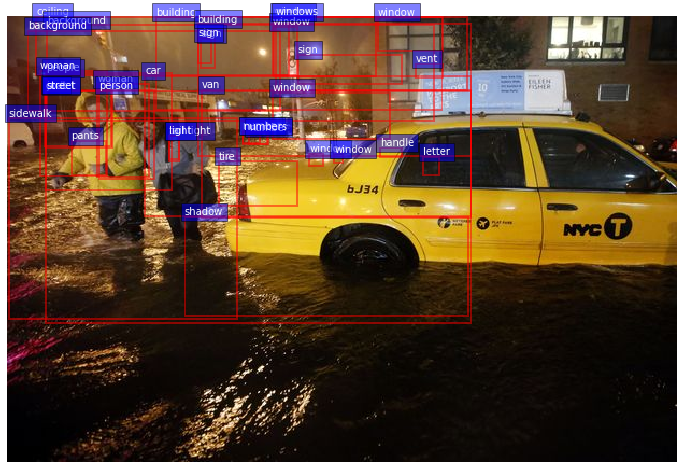

In [ ]:
# output = output[0]['instances']
output = instances
boxes = output.pred_boxes
sc1 = output.scores
scores = output.pred_classes
# print(boxes)
# print(scores)
# print(classes)
dets = boxes.tensor.cpu() / dataset_dict['im_scale']
scores = scores.cpu()

print(dets.shape)
print(scores.shape)
print(sc1)
# feats = features_pooled[0].cpu()
# attr_scores = attr_scores[0].cpu()
print(scores)

# max_conf = torch.zeros((scores.shape[0])).to(scores.device)
# for cls_ind in range(1, scores.shape[1]):
#         cls_scores = scores[:, cls_ind]
#         keep = nms(dets, cls_scores, 0.3)
#         max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep],
#                                     cls_scores[keep],
#                                     max_conf[keep])
            
# keep_boxes = torch.nonzero(max_conf >= CONF_THRESH).flatten()
# if len(keep_boxes) < MIN_BOXES:
#     keep_boxes = torch.argsort(max_conf, descending=True)[:MIN_BOXES]
# elif len(keep_boxes) > MAX_BOXES:
#     keep_boxes = torch.argsort(max_conf, descending=True)[:MAX_BOXES]

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(im)

keep_boxes = dets.numpy()
objects = scores.numpy()
# objects = np.argmax(scores[keep_boxes].numpy()[:,1:], axis=1)
# attr_thresh = 0.1
# attr = np.argmax(attr_scores[keep_boxes].numpy()[:,1:], axis=1)
# attr_conf = np.max(attr_scores[keep_boxes].numpy()[:,1:], axis=1)

for i in range(len(keep_boxes)):
    bbox = keep_boxes[i]
    if bbox[0] == 0:
        bbox[0] = 1
    if bbox[1] == 0:
        bbox[1] = 1
    cls = classes[objects[i]+1]
    # if attr_conf[i] > attr_thresh:
    #     cls = attributes[attr[i]+1] + " " + cls
    plt.gca().add_patch(
        plt.Rectangle((bbox[0], bbox[1]),
                      bbox[2] - bbox[0],
                      bbox[3] - bbox[1], fill=False,
                      edgecolor='red', linewidth=2, alpha=0.5)
            )
    plt.gca().text(bbox[0], bbox[1] - 2,
                '%s' % (cls),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=10, color='white')
print('boxes={}'.format(len(keep_boxes)))

In [ ]:
len(classes)

1601

In [ ]:
class TransformerMapping(nn.Module):
    """ Self-attention layer for image branch
    """
    def __init__(self, opt):
        super(TransformerMapping, self).__init__()
        self.opt = opt
        bert_config = BertConfig.from_json_file(opt.trans_cfg)
        self.layer = bert.BERTLayer(bert_config)
        self.mapping = nn.Linear(opt.img_dim, opt.final_dims)
        #self.mapping2 = nn.Linear(opt.final_dims, opt.final_dims)

    def forward(self, x):
        # x: (batch_size, patch_num, img_dim)
        x = self.mapping(x) # x: (batch_size, patch_num, final_dims)
        attention_mask = torch.ones(x.size(0), x.size(1))
        if torch.cuda.is_available():
            attention_mask = attention_mask.cuda()
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)
        extended_attention_mask = extended_attention_mask.float()
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0
        hidden_states = self.layer(x, extended_attention_mask)
        # hidden_states = self.mapping2(hidden_states)
        embed = torch.mean(hidden_states, 1) # (batch_size, final_dims)
        codes = F.normalize(embed, p=2, dim=1)  # (N, C)
        return codes